In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import ta
import quantstats as qs

In [2]:
def load_weekly_data(ticker):
    df = yf.download(ticker, interval = '1wk', period = 'max')[['Open','High','Low','Close','Volume','Adj Close']].reset_index()
    df['Ratio'] = df['Adj Close'] / df['Close']
    df['Open'] = df['Open'] * df['Ratio']
    df['High'] = df['High'] * df['Ratio']
    df['Low'] = df['Low'] * df['Ratio']
    df['Close'] = df['Close'] * df['Ratio']
    df = df.drop(['Ratio', 'Adj Close'], axis = 1)
    df.columns = ['date','open','high','low','close','volume']
    df = df.set_index(['date'])
    df = df.dropna()
    
    return df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2008-07-07  2008-07-07
End Period                 2022-06-13  2022-06-13
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          688.6%      295.76%
CAGR﹪                     15.96%      10.37%

Sharpe                     2.62        1.31
Prob. Sharpe Ratio         100.0%      98.7%
Smart Sharpe               2.61        1.31
Sortino                    3.92        1.89
Smart Sortino              3.91        1.89
Sortino/√2                 2.77        1.34
Smart Sortino/√2           2.77        1.33
Omega                      1.59        1.59

Max Drawdown               -19.71%     -47.17%
Longest DD Days            567         847
Volatility (ann.)          28.92%      43.51%
R^2                        0.03        0.03
Information Ratio          0.02        0.02
Calmar                     0.81       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-17,2020-03-16,2020-06-08,112,-19.712586,-15.164614
2,2008-08-18,2008-10-20,2010-03-08,567,-19.070082,-18.295805
3,2018-01-29,2018-12-17,2019-07-01,518,-14.669644,-13.127004
4,2022-04-04,2022-06-13,2022-06-13,70,-12.096751,-9.908590
5,2013-05-20,2013-06-17,2013-07-08,49,-10.329743,-6.790923


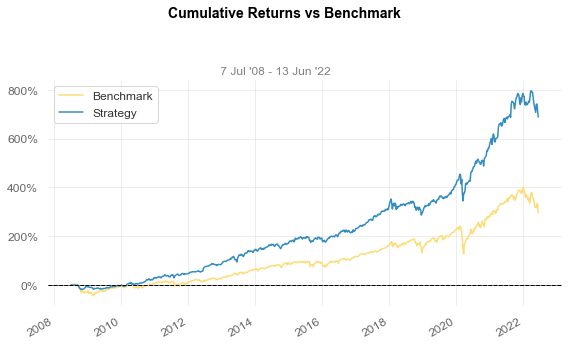

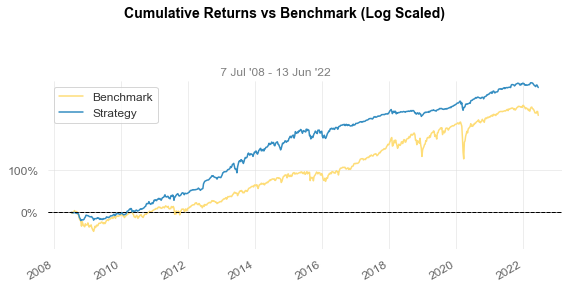

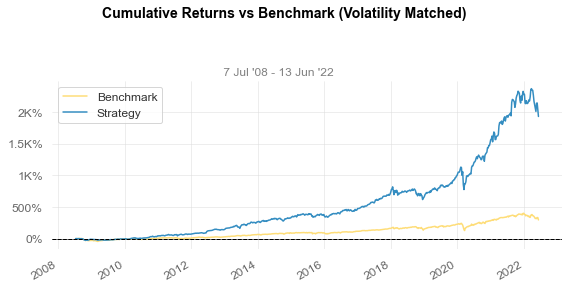

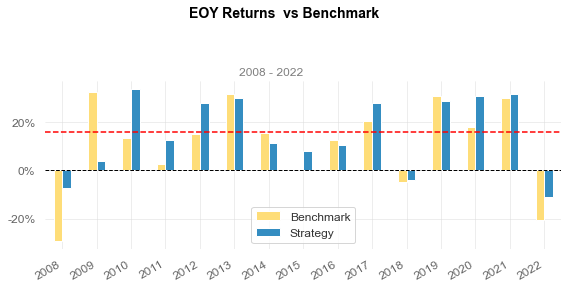

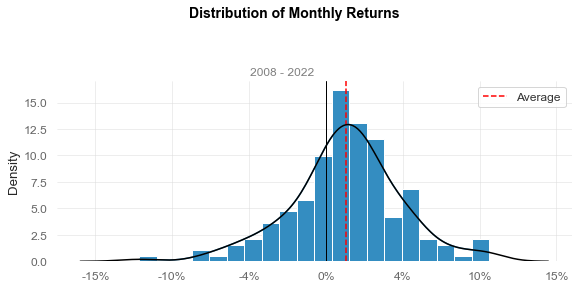

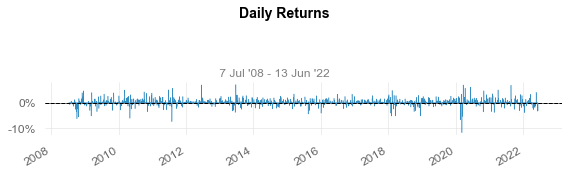

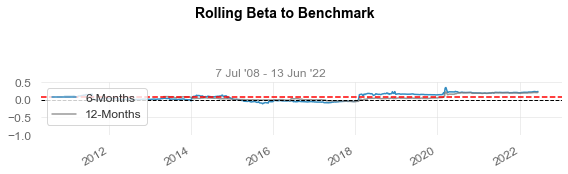

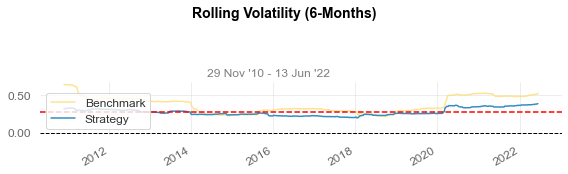

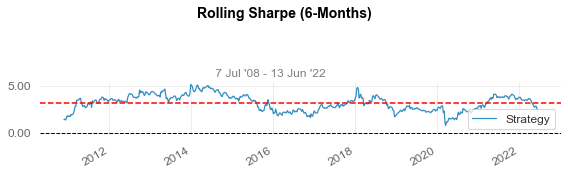

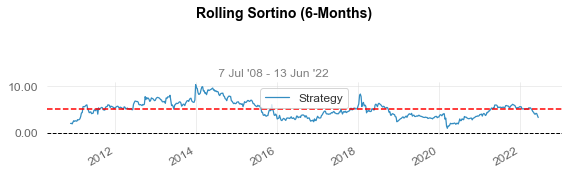

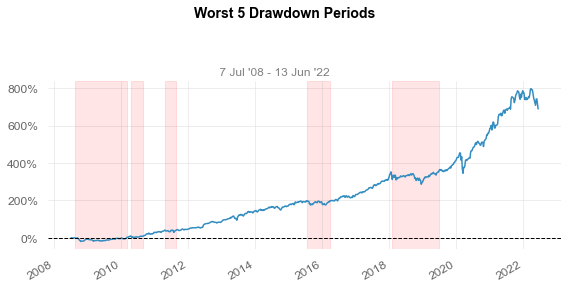

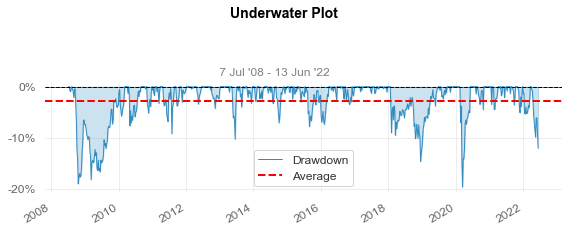

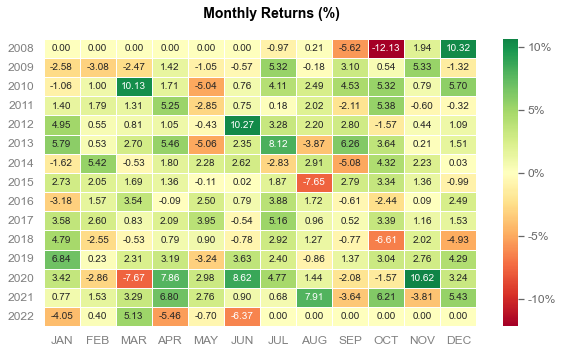

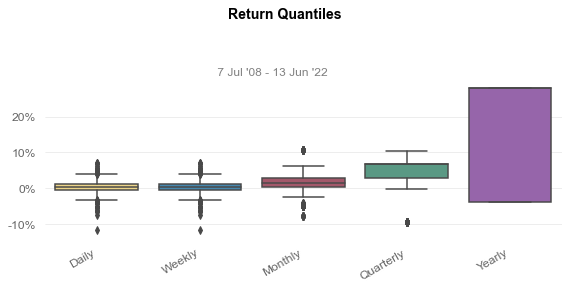

In [3]:
tickerList = ['SPY', 'QQQ', 'VNQ', 'REM', 'IEF', 'TLT', 'TIP', 'VGK', 'EWJ' ,'SCZ', 'EEM', 
           'RWX', 'BWX', 'DBC', 'GLD']

df = pd.DataFrame(index = load_weekly_data('SPY').index)

for ticker in tickerList:
    df[ticker] = load_weekly_data(ticker).close
    
df.dropna(inplace = True)
momentum = pd.DataFrame(index = df.index)
for ticker in tickerList:
    momentum[ticker] = df[ticker]/ta.momentum.kama(df[ticker], window = 30, pow1 = 10, pow2 = 30) - 1

momentum.dropna(inplace = True)
momentum = momentum.tail(len(momentum) - 1)

rank = momentum.rank(pct = True, axis = 1);mask = rank >= 2/3;nAssets = np.sum(np.where(mask == True, 1, 0), axis = 1)
returns = df[mask.shift(1)].tail(len(rank)).pct_change();returns['nAssets'] = nAssets
returns['portfolio'] = returns[returns.columns[:len(tickerList)]].sum(axis = 1)/returns.nAssets
qs.reports.full(returns.portfolio, 'SPY')